In [29]:
import numpy as np
import pandas as pd
import matplotlib as mat
import matplotlib.pyplot as plt 
%matplotlib inline
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [30]:
df = pd.read_csv(r'C:\Users\Siranjeevi C\Data Science - Python\Iris\Iris.csv')

In [31]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [32]:
df.tail()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica


In [33]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [34]:
df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001BD56780240>,
      dtype=object)

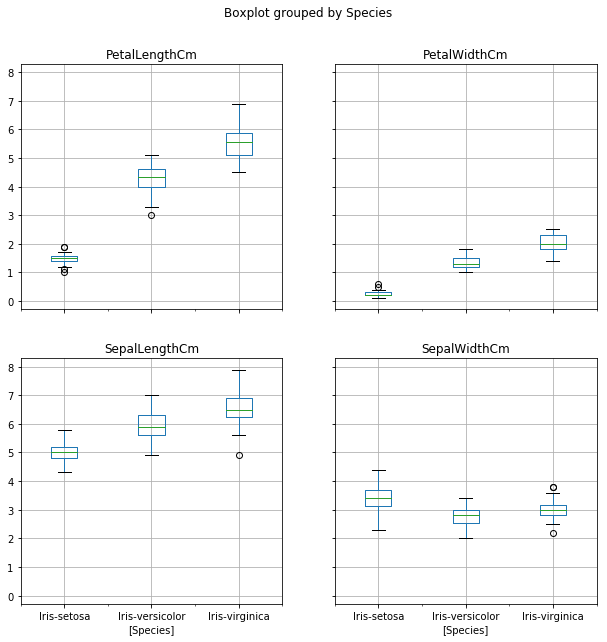

In [35]:
plt.rcParams['figure.figsize'] = [10,10]
df.iloc[:,1:].boxplot(by='Species')

In [36]:
df['SepalAreaCmSq'] = df['SepalLengthCm']*df['SepalWidthCm']
df['PetalAreaCmSq'] = df['PetalLengthCm']*df['PetalWidthCm']

In [37]:
df = df.drop(['SepalLengthCm','SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm'], axis = 1)

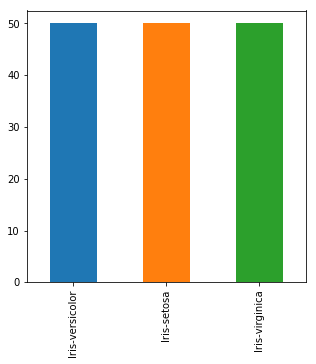

In [38]:
plt.rcParams['figure.figsize'] = [5,5]
df['Species'].value_counts().plot.bar()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001BD5733E828>,
      dtype=object)

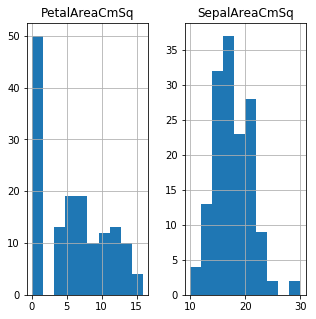

In [39]:
plt.rcParams['figure.figsize'] = [5,5]
df.iloc[:,1:].hist()

In [40]:
df = df.drop('Id', axis = 1)

In [41]:
df.head()

,Species,SepalAreaCmSq,PetalAreaCmSq
0,Iris-setosa,17.85,0.28
1,Iris-setosa,14.70,0.28
2,Iris-setosa,15.04,0.26
3,Iris-setosa,14.26,0.30
4,Iris-setosa,18.00,0.28


In [42]:
df.tail()

,Species,SepalAreaCmSq,PetalAreaCmSq
145,Iris-virginica,20.10,11.96
146,Iris-virginica,15.75,9.50
147,Iris-virginica,19.50,10.40
148,Iris-virginica,21.08,12.42
149,Iris-virginica,17.70,9.18


In [43]:
df.skew()

SepalAreaCmSq    0.499696
PetalAreaCmSq    0.266638
dtype: float64

In [44]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df['Species'] = encoder.fit_transform(df['Species'])

In [45]:
df.head()

,Species,SepalAreaCmSq,PetalAreaCmSq
0,0,17.85,0.28
1,0,14.70,0.28
2,0,15.04,0.26
3,0,14.26,0.30
4,0,18.00,0.28


In [46]:
df.tail()

,Species,SepalAreaCmSq,PetalAreaCmSq
145,2,20.10,11.96
146,2,15.75,9.50
147,2,19.50,10.40
148,2,21.08,12.42
149,2,17.70,9.18


In [47]:
x = df.iloc[:,1:]
y = df.iloc[:,0]
x_train,x_test,y_train,y_test = train_test_split (x,y,test_size=0.2,random_state=3)
model =  LogisticRegression(random_state = 3)
model.fit(x_train,y_train)

C:\Users\Siranjeevi C\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Siranjeevi C\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=3, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [48]:
y_pred = model.predict(x_test)
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
print("Accuracy Score is :",accuracy_score(y_pred,y_test))
print("Classification_Report\n",classification_report(y_pred,y_test))
print("confusion_matrix\n",confusion_matrix(y_pred,y_test)) 

Accuracy Score is : 0.9666666666666667
Classification_Report
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.90      1.00      0.95         9
           2       1.00      0.91      0.95        11

   micro avg       0.97      0.97      0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30

confusion_matrix
 [[10  0  0]
 [ 0  9  0]
 [ 0  1 10]]


In [65]:
from sklearn.model_selection import cross_val_score
Performance = cross_val_score(estimator = model , X = x_train , y= y_train , cv = 10)
print("Cross Validation score : ",Performance.mean())

Cross Validation score :  0.9666666666666666


C:\Users\Siranjeevi C\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Siranjeevi C\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Siranjeevi C\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Siranjeevi C\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Siranjeevi C\Anaconda3\lib\site-packages\sklearn\linear_model\logisti

In [73]:
from sklearn.ensemble import RandomForestRegressor
RFR = RandomForestRegressor(n_estimators=10)
RFR.fit(x_train,y_train)
y_pred1 = RFR.predict(x_test)

In [74]:
from sklearn.metrics import r2_score
print('R2 SCORE:\n',r2_score(y_pred1,y_test))

R2 SCORE:
 0.9899903415576433


In [75]:
from sklearn.model_selection import cross_val_score
Performance = cross_val_score(estimator = RFR , X = x_train , y= y_train , cv = 10)
print("Cross Validation score : ",Performance.mean())

Cross Validation score :  0.9485515412557103
